In [1]:
import os
import json
import matplotlib.pyplot as plt

def traverse_directory_and_count_nodes_edges(directory):
    result = {}
    node_counts = []
    edge_counts = []
    
    # Traverse the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        # Check if "graph.json" exists in the current directory
        if "graph.json" in files:
            # Construct the full path to the "graph.json" file
            graph_file_path = os.path.join(root, "graph.json")
            # print(graph_file_path)
            # Read the JSON file
            with open(graph_file_path, 'r') as f:
                graph = json.load(f)
            # print(graph)
            if isinstance(graph, list):
                graph = graph[0]
                
            # Extract the number of nodes and edges
            num_nodes = len(graph["nodes"])
            num_edges = len(graph["connectivity"][0])
            
            # Append to the lists for histogram plotting
            node_counts.append(num_nodes)
            edge_counts.append(num_edges)
            
            # Get the name of the current subdirectory
            subdir_name = os.path.basename(root)
            
            # Store the result in the dictionary
            result[subdir_name] = {
                "nodes": num_nodes,
                "edges": num_edges
            }
    
    return result, node_counts, edge_counts

import matplotlib.pyplot as plt
from collections import Counter

def plot_histograms(node_counts, edge_counts):
    plt.figure(figsize=(12, 5))
    
    # Node Counts Subplot
    plt.subplot(1, 2, 1)
    node_counter = Counter(node_counts)
    unique_nodes = sorted(node_counter.keys())
    node_frequencies = [node_counter[val] for val in unique_nodes]
    plt.bar(unique_nodes, node_frequencies, color='blue', alpha=0.7)
    plt.title("Histogram of Node Counts")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Frequency")
    for x, y in zip(unique_nodes, node_frequencies):
        plt.text(x, y + 0.1, str(y), ha='center', va='bottom')
    plt.xticks(unique_nodes, [str(val) for val in unique_nodes], rotation=45)
    
    # Edge Counts Subplot
    plt.subplot(1, 2, 2)
    edge_counter = Counter(edge_counts)
    unique_edges = sorted(edge_counter.keys())
    edge_frequencies = [edge_counter[val] for val in unique_edges]
    plt.bar(unique_edges, edge_frequencies, color='red', alpha=0.7)
    plt.title("Histogram of Edge Counts")
    plt.xlabel("Number of Edges")
    plt.ylabel("Frequency")
    for x, y in zip(unique_edges, edge_frequencies):
        plt.text(x, y + 0.1, str(y), ha='center', va='bottom')
    plt.xticks(unique_edges, [str(val) for val in unique_edges], rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage
current_directory = os.getcwd()  # Get the current working directory
result_dict, node_counts, edge_counts = traverse_directory_and_count_nodes_edges(current_directory)


In [2]:
print(node_counts), print(edge_counts)

[8, 10, 9, 15, 9, 7, 9, 6, 13, 6, 5, 6, 13, 10, 8, 6, 6, 5, 6, 5, 5, 6, 7, 9, 7, 7, 9, 10, 13, 13, 13, 7, 9, 9, 9, 11, 5, 8, 9, 8, 5, 8, 8, 9, 11, 8, 9, 9, 7, 8, 5, 4, 5, 6, 6, 5, 9, 8, 9, 11, 10, 8, 8, 5, 8, 11, 11, 6, 6, 6, 10, 12, 16, 14, 6, 6, 9, 10, 8, 27, 7, 6, 8, 5, 6, 5, 22, 9, 7, 5, 5]
[9, 13, 10, 20, 15, 9, 17, 9, 33, 6, 4, 5, 15, 17, 16, 8, 8, 4, 8, 6, 6, 8, 6, 20, 12, 12, 17, 15, 33, 33, 33, 12, 16, 20, 16, 17, 4, 16, 17, 13, 4, 9, 9, 13, 17, 7, 6, 12, 7, 7, 5, 3, 3, 12, 7, 5, 12, 12, 8, 13, 12, 16, 16, 4, 16, 24, 24, 9, 9, 5, 10, 12, 12, 20, 7, 7, 18, 20, 11, 69, 10, 7, 9, 6, 10, 6, 71, 11, 6, 7, 6]


(None, None)

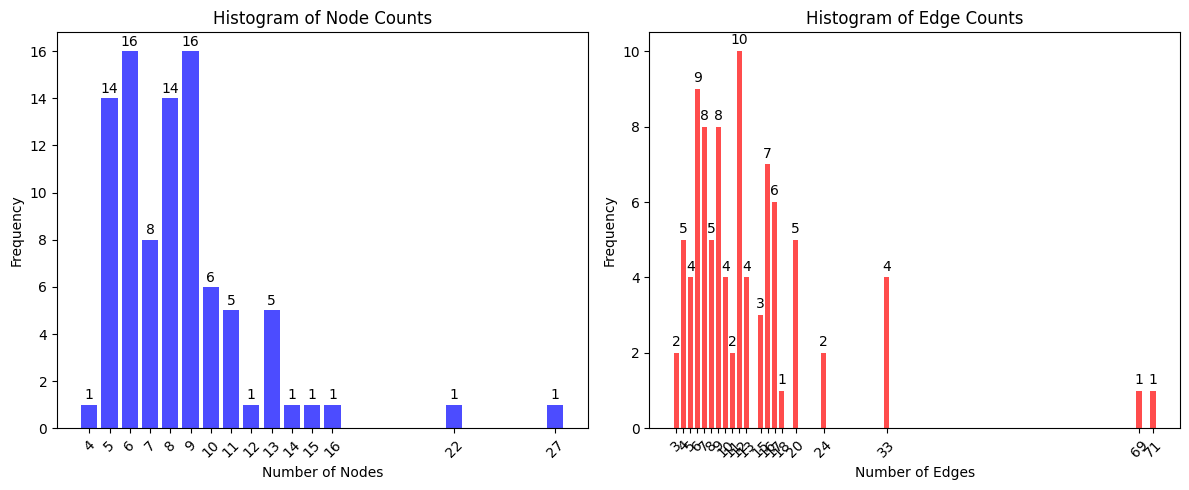

In [3]:

# Plot histograms
plot_histograms(node_counts, edge_counts)


In [6]:

# Print the result dictionary
# print(result_dict)
for subdir, counts in result_dict.items():
    print(f"Subdirectory: {subdir}")
    print(f"Number of Nodes: {counts['nodes']}")
    print(f"Number of Edges: {counts['edges']}")
    print()

Subdirectory: stagepipe3
Number of Nodes: 8
Number of Edges: 9

Subdirectory: stagepipe5
Number of Nodes: 10
Number of Edges: 13

Subdirectory: systolic1x2
Number of Nodes: 9
Number of Edges: 10

Subdirectory: systolic1x4
Number of Nodes: 15
Number of Edges: 20

Subdirectory: accu
Number of Nodes: 9
Number of Edges: 15

Subdirectory: adder_16bit
Number of Nodes: 7
Number of Edges: 9

Subdirectory: adder_16bit_csa
Number of Nodes: 9
Number of Edges: 17

Subdirectory: adder_32bit
Number of Nodes: 6
Number of Edges: 9

Subdirectory: adder_8bit
Number of Nodes: 13
Number of Edges: 33

Subdirectory: comparator_32bit
Number of Nodes: 6
Number of Edges: 6

Subdirectory: div_16bit
Number of Nodes: 5
Number of Edges: 4

Subdirectory: div_32bit
Number of Nodes: 6
Number of Edges: 5

Subdirectory: radix2_div
Number of Nodes: 13
Number of Edges: 15

Subdirectory: multi_16bit
Number of Nodes: 10
Number of Edges: 17

Subdirectory: sub_16bit
Number of Nodes: 8
Number of Edges: 16

Subdirectory: sub_3